<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-01-01 05:50:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  61.0MB/s    in 3.3s    

2026-01-01 05:50:33 (61.0 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


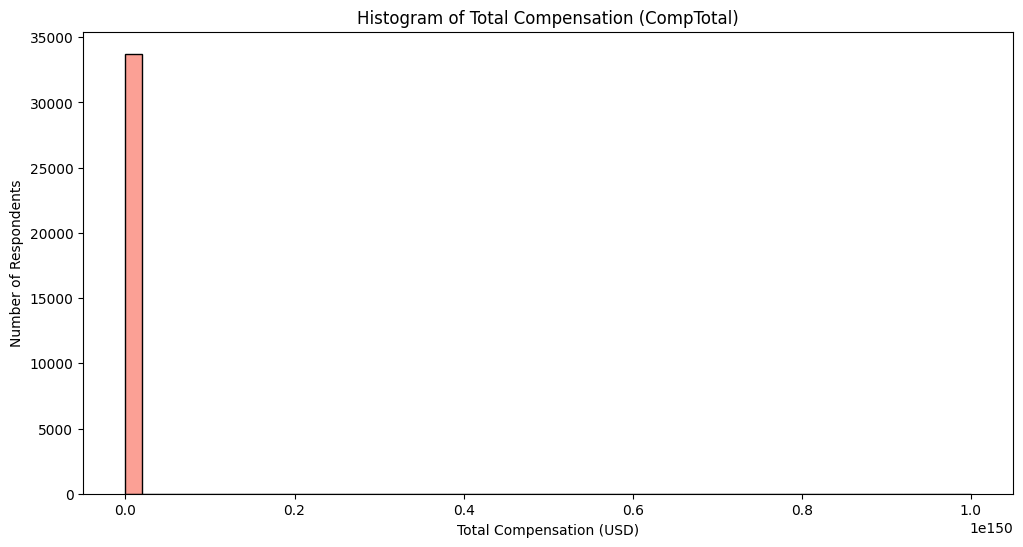

In [23]:
## Write your code here
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT * FROM main", conn)

# Convert CompTotal to numeric (in case there are non-numeric entries)
df['CompTotalNumeric'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows with missing values
df_clean = df.dropna(subset=['CompTotalNumeric'])

# Plot histogram
plt.figure(figsize=(12,6))
sns.histplot(df_clean['CompTotalNumeric'], bins=50, kde=False, color='salmon')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


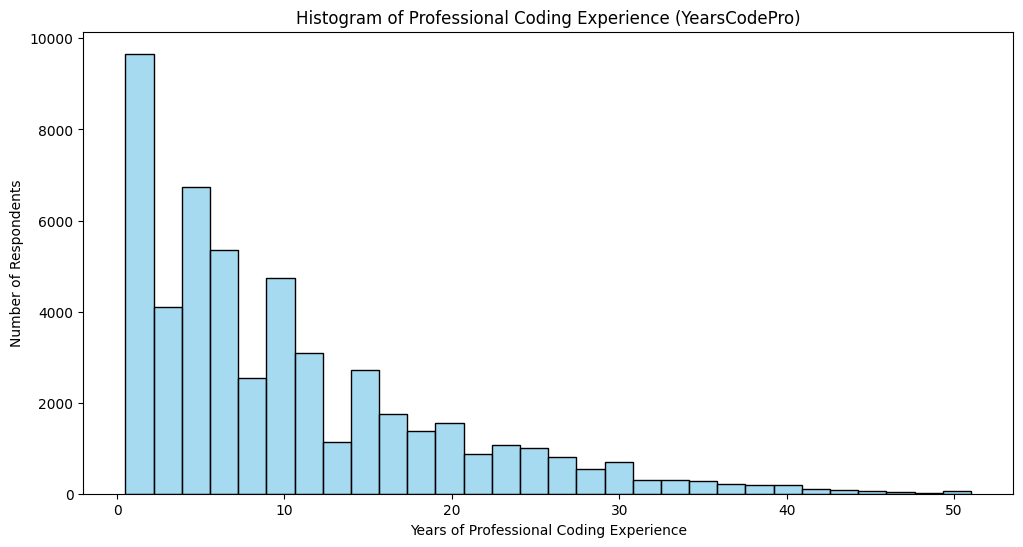

In [22]:
## Write your code here
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT * FROM main", conn)

# Convert YearsCodePro to numeric values
def years_to_numeric(x):
    if pd.isna(x):
        return None
    elif x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":
        return 51
    else:
        try:
            return float(x)
        except:
            return None

df['YearsCodeProNumeric'] = df['YearsCodePro'].apply(years_to_numeric)

# Drop missing values
df_clean = df.dropna(subset=['YearsCodeProNumeric'])

# Plot histogram
plt.figure(figsize=(12,6))
sns.histplot(df_clean['YearsCodeProNumeric'], bins=30, kde=False, color='skyblue')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Professional Coding Experience (YearsCodePro)')
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


/tmp/ipykernel_524/408903483.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AgeGroup'] = pd.cut(df_clean['AgeNumeric'], bins=bins, labels=labels, right=False)


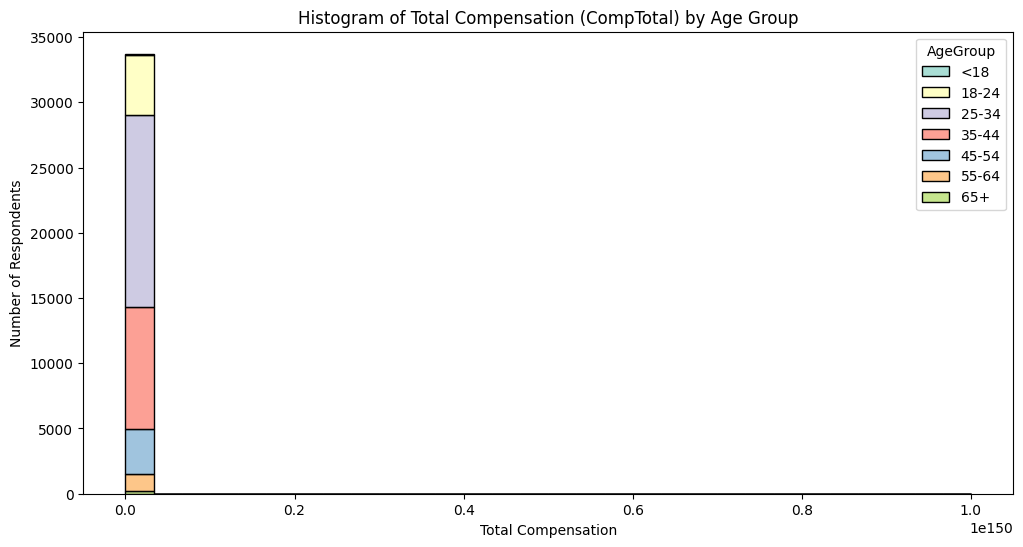

In [21]:
## Write your code here
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT * FROM main", conn)

# Map Age to numeric values
age_mapping = {
    "Under 18 years old": 10,
    "18-24 years old": 20,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with missing values in CompTotal or AgeNumeric
df_clean = df.dropna(subset=['CompTotal', 'AgeNumeric'])

# Create AgeGroup column
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_clean['AgeGroup'] = pd.cut(df_clean['AgeNumeric'], bins=bins, labels=labels, right=False)

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_clean,
    x='CompTotal',
    hue='AgeGroup',
    multiple='stack',
    bins=30,
    palette='Set3'
)
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Total Compensation (CompTotal) by Age Group')
plt.show()



**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [14]:
## Write your code here
# Check the column names
print(df.columns)

# Display first 5 rows to see what the columns look like
print(df.head())


Index(['COUNT(*)'], dtype='object')
   COUNT(*)
0     65437


/tmp/ipykernel_524/53472386.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AgeGroup'] = pd.cut(df_clean['AgeNumeric'], bins=bins, labels=labels, right=False)


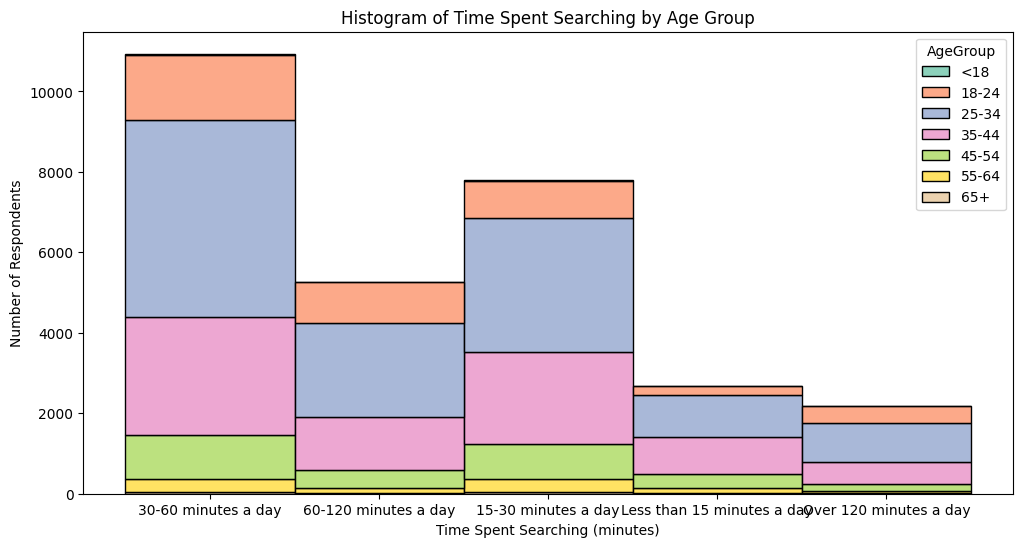

In [20]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT * FROM main", conn)

# Map Age column to numeric values first (if not done yet)
age_mapping = {
    "Under 18 years old": 10,
    "18-24 years old": 20,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with missing Age or TimeSearching
df_clean = df.dropna(subset=['AgeNumeric', 'TimeSearching'])

# Create AgeGroup column for histogram
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_clean['AgeGroup'] = pd.cut(df_clean['AgeNumeric'], bins=bins, labels=labels, right=False)

# Plot histogram
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_clean,
    x='TimeSearching',
    hue='AgeGroup',      # Now this column exists
    multiple='stack',
    bins=20,
    palette='Set2'
)
plt.xlabel('Time Spent Searching (minutes)')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Time Spent Searching by Age Group')
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


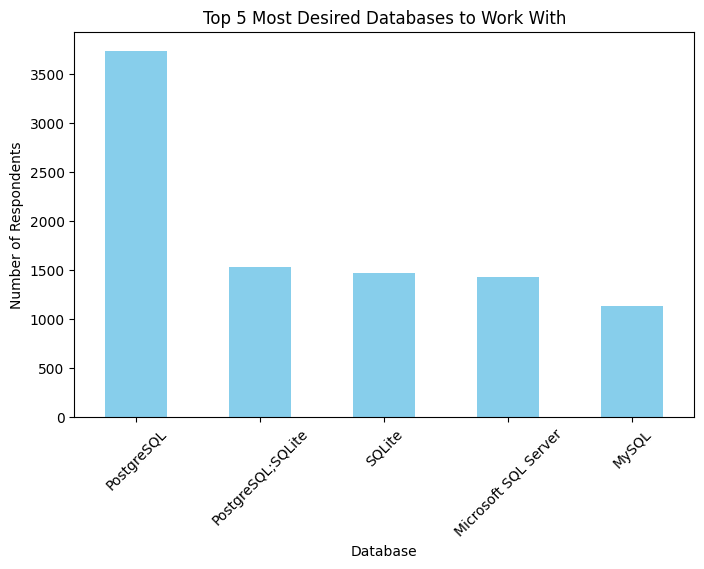

In [18]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Load the data
df = pd.read_sql_query("SELECT * FROM main", conn)

# Step 3: Count occurrences of each database
db_counts = df['DatabaseWantToWorkWith'].value_counts().head(5)  # top 5 databases

# Step 4: Plot histogram (bar chart)
plt.figure(figsize=(8, 5))
db_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.title('Top 5 Most Desired Databases to Work With')
plt.xticks(rotation=45)
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


/tmp/ipykernel_524/1550947181.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_counts.index, y=remote_counts.values, palette='viridis')


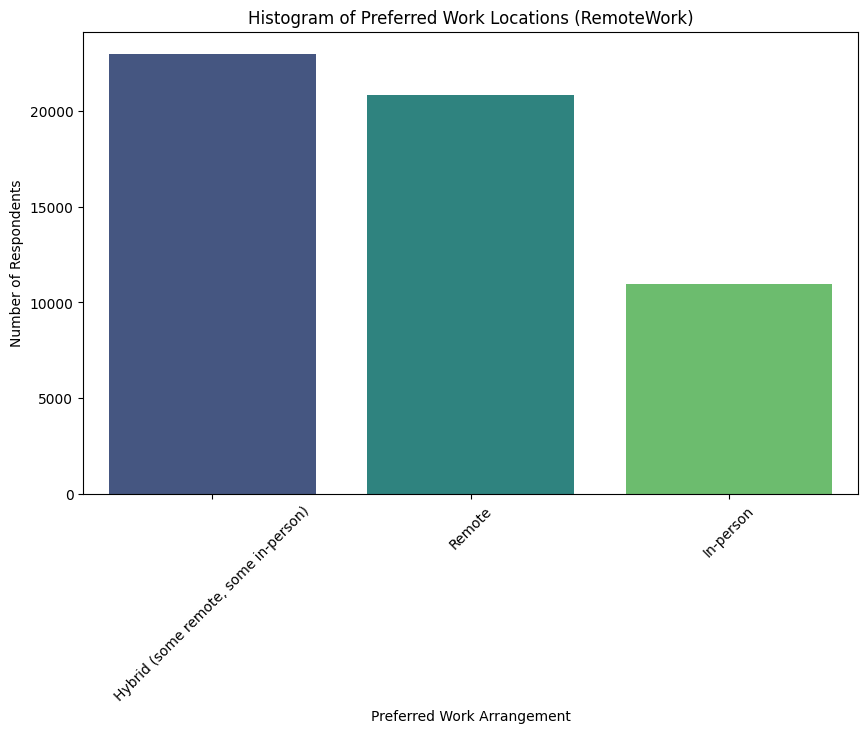

In [24]:
## Write your code here
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT * FROM main", conn)

# Drop rows with missing RemoteWork values
df_clean = df.dropna(subset=['RemoteWork'])

# Count the frequency of each category
remote_counts = df_clean['RemoteWork'].value_counts()

# Plot histogram / bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=remote_counts.index, y=remote_counts.values, palette='viridis')
plt.xlabel('Preferred Work Arrangement')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Preferred Work Locations (RemoteWork)')
plt.xticks(rotation=45)
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


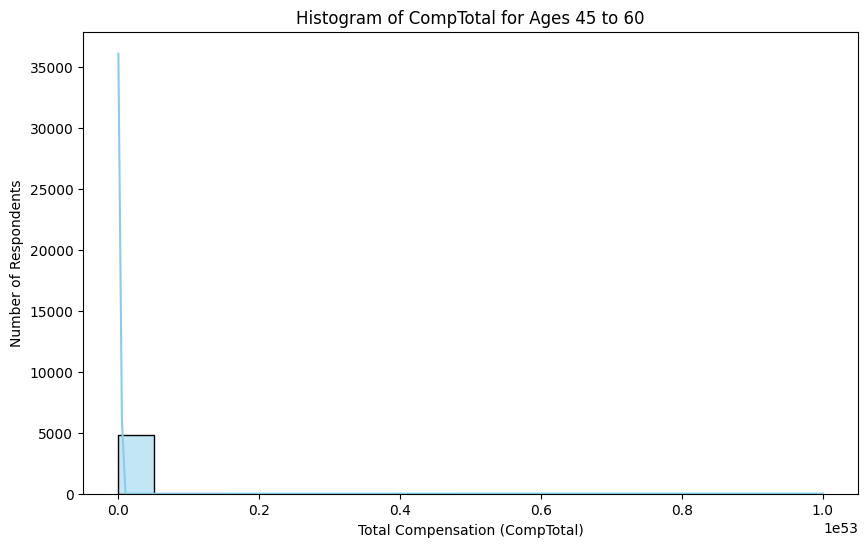

In [25]:
## Write your code here
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT * FROM main", conn)

# Ensure AgeNumeric exists (map age ranges to numeric if necessary)
age_mapping = {
    "Under 18 years old": 10,
    "18-24 years old": 20,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}

df['AgeNumeric'] = df['Age'].map(age_mapping)

# Filter for ages 45 to 60
df_mid_career = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]

# Drop rows with missing CompTotal
df_mid_career = df_mid_career.dropna(subset=['CompTotal'])

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df_mid_career['CompTotal'], bins=20, kde=True, color='skyblue')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Number of Respondents')
plt.title('Histogram of CompTotal for Ages 45 to 60')
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


/tmp/ipykernel_524/2630107804.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YearsCodeProNumeric'] = df_clean['YearsCodePro'].apply(years_to_numeric)


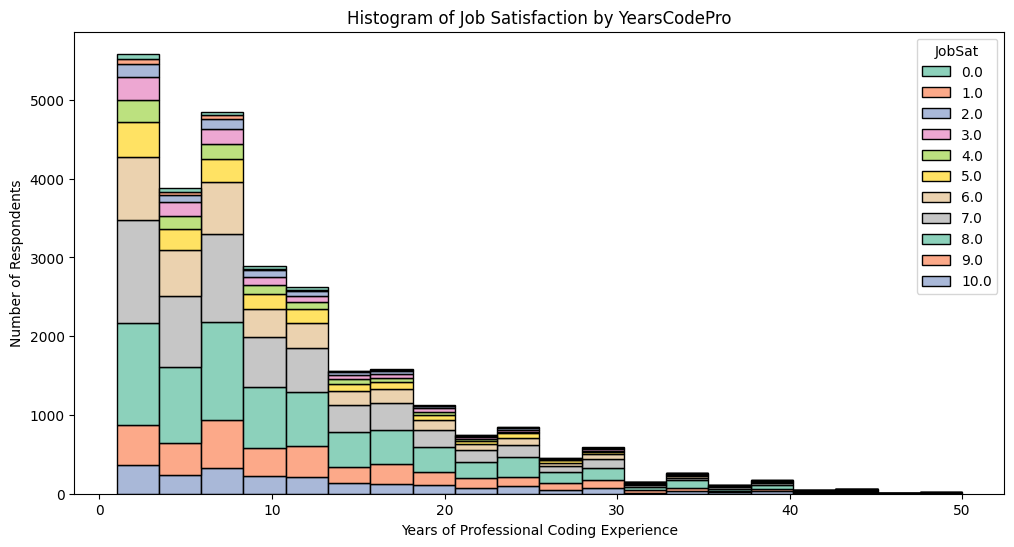

In [26]:
## Write your code here
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT * FROM main", conn)

# Clean the data: drop missing JobSat or YearsCodePro
df_clean = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Convert YearsCodePro to numeric if it's not
# Some datasets have "More than 50 years" or "< 1 year"
def years_to_numeric(val):
    try:
        if isinstance(val, str):
            if '<' in val:
                return 0.5
            elif 'More than' in val:
                return int(val.split()[2])
            else:
                return float(val)
        return val
    except:
        return None

df_clean['YearsCodeProNumeric'] = df_clean['YearsCodePro'].apply(years_to_numeric)
df_clean = df_clean.dropna(subset=['YearsCodeProNumeric'])

# Plot histogram: JobSat vs YearsCodePro
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_clean,
    x='YearsCodeProNumeric',
    hue='JobSat',
    multiple='stack',
    bins=20,
    palette='Set2'
)
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Job Satisfaction by YearsCodePro')
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [27]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
